In [1]:
import json
import pandas
import order_independent_llm
import glob
import seaborn
import tqdm.auto as tqdm
import matplotlib.pyplot as plt

import order_independent_llm.plot_helpers

params=order_independent_llm.plot_helpers.nice_defaults()

In [2]:
targets = glob.glob("../results/mmlu_permutations/*/*.jsonl")

In [3]:
df = pandas.concat([order_independent_llm.load_to_dataframe(t,fail_on_empty=True) for t in tqdm.tqdm(targets)])

  0%|          | 0/9 [00:00<?, ?it/s]

In [4]:
df_count = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).count().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)
df_count

response_type,normal,normal_permuted_0123,normal_permuted_0132,normal_permuted_0213,normal_permuted_0231,normal_permuted_0312,normal_permuted_0321,normal_permuted_1023,normal_permuted_1032,normal_permuted_1203,...,normal_permuted_2301,normal_permuted_2310,normal_permuted_3012,normal_permuted_3021,normal_permuted_3102,normal_permuted_3120,normal_permuted_3201,normal_permuted_3210,normal_reversed,order_independent
model,,,,,,,,,,,,,,,,,,,,,
meta-llama/Llama-2-7b-chat-hf,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,...,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
meta-llama/Llama-2-7b-hf,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,...,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
meta-llama/Meta-Llama-3-8B,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,...,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144


In [5]:
df_acc = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)
df_acc

response_type,normal,normal_permuted_0123,normal_permuted_0132,normal_permuted_0213,normal_permuted_0231,normal_permuted_0312,normal_permuted_0321,normal_permuted_1023,normal_permuted_1032,normal_permuted_1203,...,normal_permuted_2301,normal_permuted_2310,normal_permuted_3012,normal_permuted_3021,normal_permuted_3102,normal_permuted_3120,normal_permuted_3201,normal_permuted_3210,normal_reversed,order_independent
model,,,,,,,,,,,,,,,,,,,,,
meta-llama/Llama-2-7b-chat-hf,0.281469,0.281469,0.266608,0.275350,0.263986,0.262238,0.276224,0.262238,0.270979,0.276224,...,0.271853,0.276224,0.248252,0.257867,0.257867,0.248252,0.26049,0.262238,0.262238,0.278846
meta-llama/Llama-2-7b-hf,0.263112,0.263112,0.267483,0.265734,0.274476,0.261364,0.263986,0.250874,0.265734,0.261364,...,0.259615,0.231643,0.239510,0.256993,0.247378,0.225524,0.25000,0.232517,0.232517,0.274476
meta-llama/Meta-Llama-3-8B,0.272727,0.272727,0.251748,0.277972,0.287587,0.258741,0.291084,0.274476,0.270979,0.292832,...,0.315559,0.265734,0.256119,0.279720,0.258741,0.270979,0.26486,0.248252,0.248252,0.236888


In [6]:
perms = list(df['response_type'].unique())[3:]

In [16]:
print(ax.patches[9])

Rectangle(xy=(-0.3, 0), width=0.0333333, height=0.263986, angle=0)


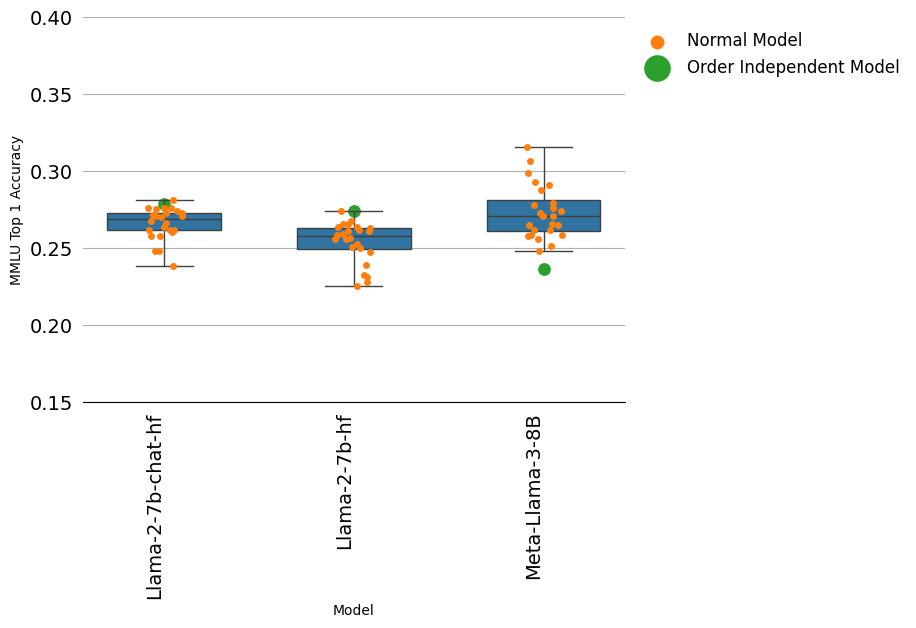

In [37]:
fig, ax  = plt.subplots(figsize = (7,5))
seaborn.boxplot(
    #hue = 'response_type',
    x = 'model',
    y ='is_correct_answer',
    data = df[df['response_type'].isin(perms)][['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index(),
    ax = ax,
    whis=[0, 100],
    width =.6,
    #label = 'Normal',
)
seaborn.stripplot(
    #hue = 'response_type',
    x = 'model',
    y ='is_correct_answer',
    data = df[df['response_type'].isin(perms)][['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index(),
    ax = ax,
    #whis=[0, 100],
    #width =.6,
    label = 'Normal Model',
)
#sns.stripplot(planets, x="distance", y="method", size=4, color=".3")

seaborn.scatterplot(
    #hue = 'response_type',
    x = 'model',
    y ='is_correct_answer',
    data = df[df['response_type'] == 'order_independent'][['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index(),
    ax = ax,
    s = 100,
    label = 'Order Independent Model',
)
ax.set_ylim([.15,.4])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')

ax.legend(ax.get_legend_handles_labels()[0][-2:],ax.get_legend_handles_labels()[1][-2:],bbox_to_anchor=(1,1),loc = 'upper left')
ax.set_xlabel("Model")
ax.set_ylabel("MMLU Top 1 Accuracy")
order_independent_llm.plot_helpers.multi_savefig("MMLU-ACC-perms")

In [8]:
df_piv = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', 'only_parallel_attention',
       'only_parallel_attention_reversed', 'only_parallel_position',
       'only_parallel_position_reversed']]
df_piv

response_type,normal,order_independent,normal_reversed,only_parallel_attention,only_parallel_attention_reversed,only_parallel_position,only_parallel_position_reversed
model,,,,,,,
WizardLM/WizardLM-7B-V1.0,0.395849,0.395388,0.395542,0.395388,0.395388,0.395849,0.395542
gpt2,0.252440,0.253681,0.253433,0.258644,0.259140,0.252440,0.253433
lmsys/vicuna-7b-v1.5,0.290447,0.272225,0.295417,0.277011,0.276643,0.271857,0.288239
meta-llama/Llama-2-13b-chat-hf,0.283388,0.279665,0.294323,0.283620,0.289902,0.271056,0.273150
meta-llama/Llama-2-13b-hf,0.252709,0.256897,0.264039,0.245320,0.254433,0.268719,0.261576
meta-llama/Llama-2-7b-chat-hf,0.300487,0.281402,0.308202,0.291148,0.290065,0.286681,0.289930
meta-llama/Llama-2-7b-hf,0.268887,0.263891,0.268282,0.260409,0.267827,0.263891,0.259955
meta-llama/Meta-Llama-3-8B,0.323599,0.278617,0.318899,0.272910,0.289023,0.274924,0.283317
mistralai/Mistral-7B-Instruct-v0.2,0.303110,0.269764,0.291870,0.270513,0.281004,0.286250,0.280629


In [9]:
df[(df['model']=='meta-llama/Llama-2-7b-hf') & (df['response_type'] == 'normal')].groupby('prompt').count().sort_values('is_correct_answer')

,response_type,model,max_new_tokens,order_independent_output,pad_attention,text_output,is_correct_answer,correct_answer_prob,raw_output_contains_correct_answer_only,edit_position,edit_attention,meta_label,meta_incorrect_answers,file_name
prompt,,,,,,,,,,,,,,
A 10% increase (decrease) in price produces a 10% decrease (increase) in quantity demanded. This is referred to as:<|start_2d|>Zero price elasticity of demand.<|split_2d|>Infinite price elasticity of demand.<|split_2d|>Unit price elasticity of demand.<|split_2d|>Indefinite price elasticity of demand.<|end_2d|> Answer:,1,1,1,1,1,1,1,1,1,1,1,1,1,1
The will theory of rights maintains that the enforcement of Y's duty requires the exercise of will by X. It assumes the correlativity of rights and duties. Which of the following succeeds in formulating the interest theory without this correlativity?<|start_2d|>Regarding X's interest as directly related to Y's duty.<|split_2d|>Accepting that conferring right means that the interest represented by that right ought to be recognized.<|split_2d|>Treating an interest as the exercise of choice.<|split_2d|>Asserting that X has a right whenever the protection of his interest is recognized as a reason for imposing duties -only when they are actually imposed.<|end_2d|> Answer:,1,1,1,1,1,1,1,1,1,1,1,1,1,1
The weight percent of sodium hydroxide dissolved in water is 50%. What is the mole fraction of sodium hydroxide?<|start_2d|>31.00%<|split_2d|>0.164<|split_2d|>0.311<|split_2d|>0.5<|end_2d|> Answer:,1,1,0,1,1,1,1,1,0,1,1,1,1,1
"The weight of an object on the moon, m, is about q of the object’s weight on Earth, e. Which equation represents the approximate weight of an object on the moon in terms of the object's weight on Earth?<|start_2d|>m = 1/6 + e<|split_2d|>m = e/6<|split_2d|>m = 6+e<|split_2d|>m = 6e<|end_2d|> Answer:",1,1,0,1,1,1,1,1,0,1,1,1,1,1
"The weight of an aspirin tablet is 300 milligrams according to the bottle label. An FDA investigator weighs a simple random sample of seven tablets, obtains weights of 299, 300, 305, 302, 299, 301, and 303, and runs a hypothesis test of the manufacturer's claim. Which of the following gives the P-value of this test?<|start_2d|>P(t > 1.54) with df = 6<|split_2d|>2P(t > 1.54) with df = 6<|split_2d|>P(t > 1.54) with df = 7<|split_2d|>2P(t > 1.54) with df = 7<|end_2d|> Answer:",1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Knowledge of different categories of trees and where they grow best is an example of what kind of long-term memory?<|start_2d|>episodic memory<|split_2d|>semantic memory<|split_2d|>procedural memory<|split_2d|>eidetic memory<|end_2d|> Answer:,2,2,2,2,2,2,2,2,2,2,2,2,2,2
"Stephanie flew 2,448 miles from Los Angeles to New York City. What is the number of miles Stephanie flew rounded to the nearest thousand?<|start_2d|>2,000<|split_2d|>2,400<|split_2d|>2,500<|split_2d|>3,000<|end_2d|> Answer:",2,2,0,2,2,2,2,2,0,2,2,2,2,2
"A 10 kg box slides horizontally without friction at a speed of 1 m/s. At one point, a constant force is applied to the box in the direction of its motion. The box travels 5 m with the constant force applied. The force is then removed, leaving the box with a speed of 2 m/s. Which of the following gives the magnitude of the applied force?<|start_2d|>1 N<|split_2d|>2 N<|split_2d|>3 N<|split_2d|>4 N<|end_2d|> Answer:",2,2,0,2,2,2,2,2,0,2,2,2,2,2


In [15]:
plot_dat = []
for model in df['model'].unique():
    df_conf = df[(df['model']==model)].drop_duplicates(['prompt','response_type']).pivot(
        index = 'prompt',
        columns='response_type',
        values='is_correct_answer'
    )[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count().reset_index().pivot(
        index = 'normal',
        columns='normal_reversed',
        values='order_independent'
    )
    df_mean = df[(df['model']==model)].drop_duplicates(['prompt','response_type']).pivot(
        index = 'prompt',
        columns='response_type',
        values='is_correct_answer'
    )[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count()
    df_mean = df_mean / df_mean.sum().sum()
    df_normed = df_conf /df_conf.sum().sum()
    print(model)
    print(df_conf.reset_index().to_markdown(index=False))
    print(df_normed.reset_index().to_markdown(index=False))
    plot_dat.append({
    'model':model,
    'acc' : float(df_mean.loc[(True,False)]) + float(df_mean.loc[(True,True)]),
    'error' : float(df_mean.loc[(False,True)]), # float(df_mean.loc[(True,False)]) + 
    'oid' : False,
    #'oid' : float(df[(df['model']==model) & (df['response_type']=='order_independent')].drop_duplicates(['prompt','response_type'])['is_correct_answer'].mean())
    })
    plot_dat.append({
    'model':model,
    'acc' : float(df[(df['model']==model) & (df['response_type']=='order_independent')].drop_duplicates(['prompt','response_type'])['is_correct_answer'].mean()),
    'error' : 0,
    'oid' : True,
    #'oid' : 
    })

lmsys/vicuna-7b-v1.5
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    3128 |    713 |
| True     |     687 |    882 |
| normal   |    False |     True |
|:---------|---------:|---------:|
| False    | 0.578189 | 0.131793 |
| True     | 0.126987 | 0.163031 |
meta-llama/Llama-2-7b-chat-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    4144 |   1007 |
| True     |     951 |   1263 |
| normal   |    False |     True |
|:---------|---------:|---------:|
| False    | 0.562661 | 0.136728 |
| True     | 0.129124 | 0.171487 |
meta-llama/Llama-2-7b-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    4235 |    577 |
| True     |     581 |   1189 |
| normal   |    False |      True |
|:---------|---------:|----------:|
| False    | 0.643421 | 0.0876633 |
| True     | 0.088271 | 0.180644  |
meta-llama/Llama-2-13b-chat-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    2542 

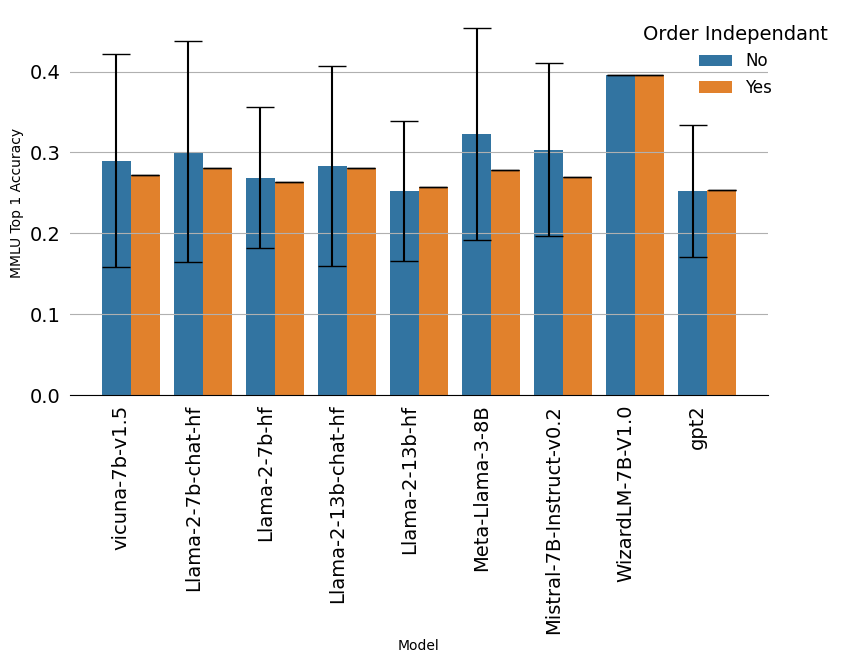

In [17]:
df_plot = pandas.DataFrame(plot_dat)
fig, ax = plt.subplots()
#ax = sns.barplot(x='Param', y='Value', data=df, hue='Name', palette='CMRmap_r')
seaborn.barplot(
    x = 'model',
    y = 'acc',
    data =df_plot,
    hue ='oid',
    #yerr = df_plot['error'],
    ax = ax
)

err_patches =  ax.patches[:9]
oid_patches =  ax.patches[9:-2]

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches][:-2]
y_coords = [p.get_height() for p in ax.patches][:-2]
ax.errorbar(x=[p.get_x() + 0.5 * p.get_width() for p in err_patches], y=[p.get_height() for p in err_patches], 
            yerr=df_plot[df_plot['oid'] == False]["error"], fmt="none", c="k")

ax.errorbar(x=[p.get_x() + 0.5 * p.get_width() for p in oid_patches], y=[p.get_height() for p in oid_patches], 
            yerr=df_plot[df_plot['oid'] == True]["error"], fmt="none", c="k")
#ax.set_ylim([.15,.5])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
patches, labels = ax.get_legend_handles_labels()
label_map = {
    'True' : "Yes",
    "False" : "No",
}
labels = [label_map[l] for l in labels]
ax.legend(patches, labels,bbox_to_anchor=(.8,1),loc = 'upper left', title='Order Independant')
ax.set_xlabel("Model")
ax.set_ylabel("MMLU Top 1 Accuracy")
order_independent_llm.plot_helpers.multi_savefig("MMLU-ACC-errors")